In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors  # Import the colormap module
import numpy as np
from collections import Counter
import math

In [50]:
# Load the Netflix dataset
netflix_data = pd.read_csv("/Users/asaifali/Downloads/netflix_titles.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [51]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [52]:
netflix_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [53]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [54]:
# Replace null values in 'director' and 'cast' with 'Unknown'
netflix_data['director'].fillna('Unknown', inplace=True)
netflix_data['cast'].fillna('Unknown', inplace=True)
netflix_data['country'].fillna('Unknown', inplace=True)
#netflix_data['date_added'].fillna('Unknown', inplace=True)
netflix_data['rating'].fillna('Unknown', inplace=True)
netflix_data['duration'].fillna('Unknown', inplace=True)
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [55]:
netflix_data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [56]:
# Enable xkcd mode in Matplotlib
plt.xkcd()

/var/folders/89/zwv576xj2cggljymv3ln02780000gn/T/ipykernel_24592/133171438.py:51: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)


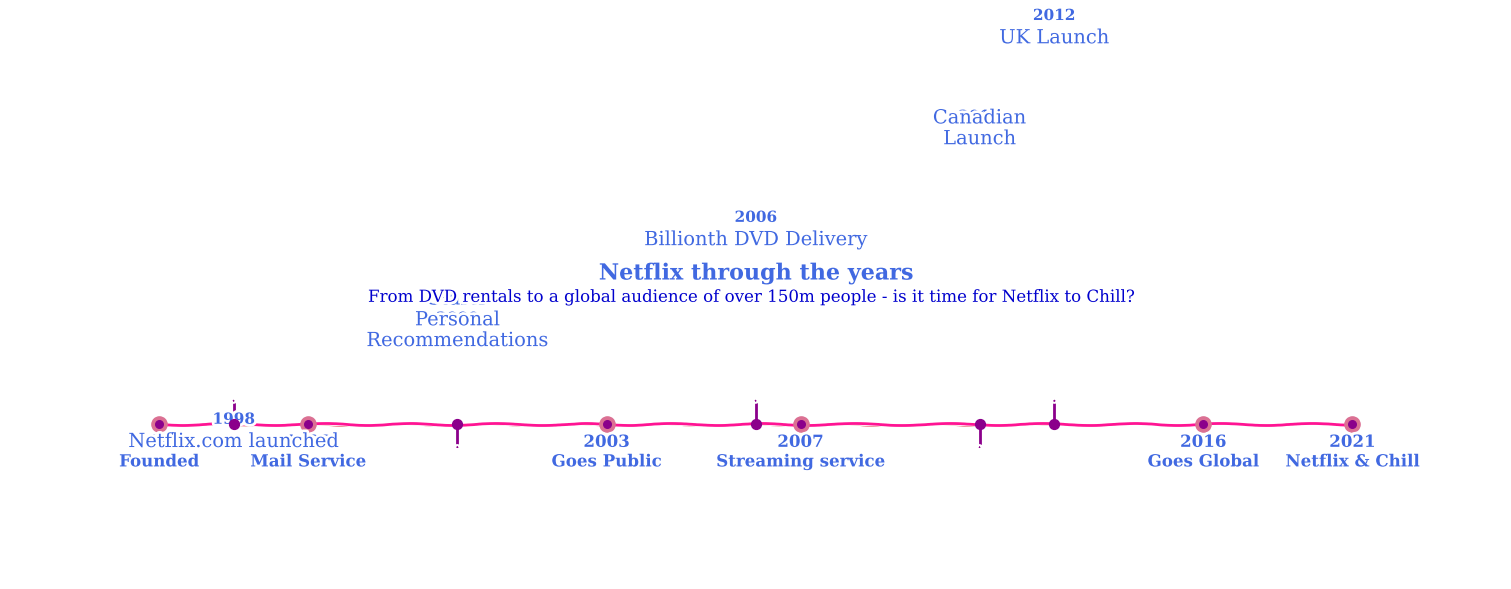

In [57]:
# Dates
tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]
tl_x = [1, 2, 4, 5.3, 8, 9]

# Time Points
tl_sub_x = [1.5, 3, 5, 6.5, 7]
tl_sub_times = ["1998", "2000", "2006", "2010", "2012"]

# Text
tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations",
    "Billionth DVD Delivery",
    "Canadian\nLaunch",
    "UK Launch"
]

with plt.xkcd():
    # Set figure & Axes
    fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
    ax.set_ylim(-2, 1.75)
    ax.set_xlim(0, 10)

    # Timeline : line
    ax.axhline(0, xmin=0.1, xmax=0.9, c='deeppink', zorder=1)

    # Timeline : Date Points
    ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='palevioletred', zorder=2)
    ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='darkmagenta', zorder=3)

    # Timeline : Time Points
    ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='darkmagenta', zorder=4)

    # Date Text
    for x, date in zip(tl_x, tl_dates):
        ax.text(x, -0.55, date, ha='center',
                fontfamily='serif', fontweight='bold',
                color='royalblue', fontsize=12)

    # Stemplot : vertical line
    levels = np.zeros(len(tl_sub_x))
    levels[::2] = 0.3
    levels[1::2] = -0.3
    markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)
    plt.setp(baseline, zorder=0)
    plt.setp(markerline, marker=',', color='darkmagenta')
    plt.setp(stemline, color='darkmagenta')

    # Text
    for idx, (x, time, txt) in enumerate(zip(tl_sub_x, tl_sub_times, tl_text), 1):
        ax.text(x, 1.3*(idx-1), time, ha='center',
                fontfamily='serif', fontweight='bold',
                color='royalblue', fontsize=11)
        ax.text(x, 1.3*(idx-1)-0.3, txt, ha='center',
                fontfamily='serif', color='royalblue')

    # Spine
    for spine in ["left", "top", "right", "bottom"]:
        ax.spines[spine].set_visible(False)

    # Ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Title
    ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='royalblue')
    ax.text(2.4, 1.57, "From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?",
            fontfamily='serif', fontsize=12, color='mediumblue')

    plt.show()


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

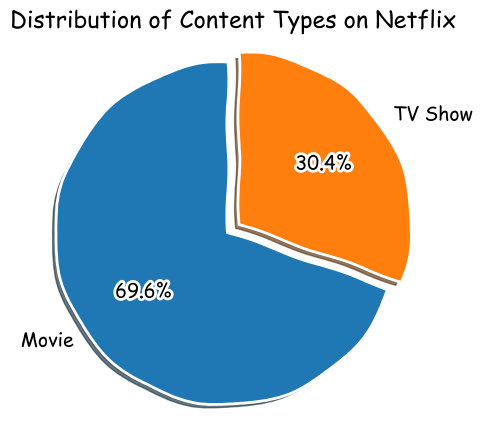

In [58]:
# Assuming netflix_data is your DataFrame containing the Netflix data and col is the column name for content types
col = "type"

# Group by content types and count occurrences
grouped = netflix_data[col].value_counts().reset_index()
grouped = grouped.rename(columns={col: "count", "index": col})

# Create the pie chart with xkcd style
with plt.xkcd():
    explode = (0, 0.1)  # "explode" the 2nd slice (i.e., 'TV Show')
    fig1, ax1 = plt.subplots(figsize=(5, 5), dpi=100)
    ax1.pie(grouped["count"], explode=explode, labels=grouped["type"], autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title("Distribution of Content Types on Netflix")
    plt.show()


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

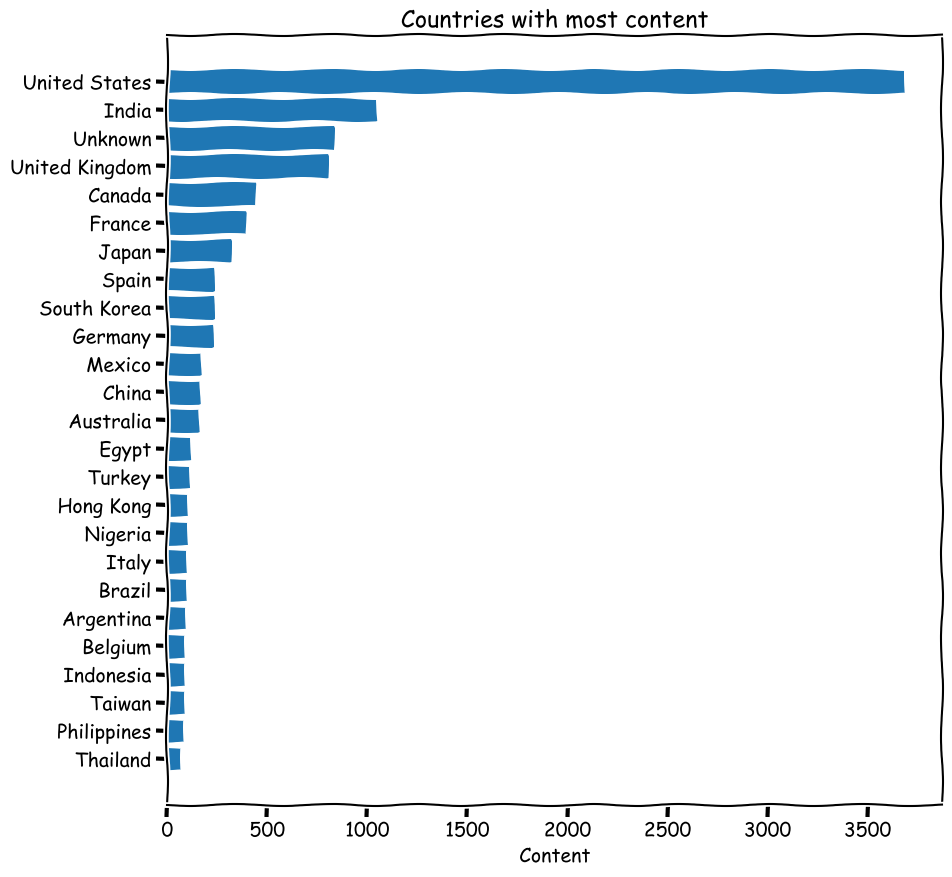

In [59]:
# Assuming netflix_data is your DataFrame containing the Netflix data and col is the column name for countries
col = "country"

# Extract categories from the DataFrame and count occurrences
categories = ", ".join(netflix_data[col].fillna("")).split(", ")
counter_list = Counter(categories).most_common(25)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list]
values = [_[1] for _ in counter_list]

# Create the plot with xkcd style
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
    y_pos = np.arange(len(labels))
    ax.barh(y_pos, values, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Content')
    ax.set_title('Countries with most content')

    plt.show()


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

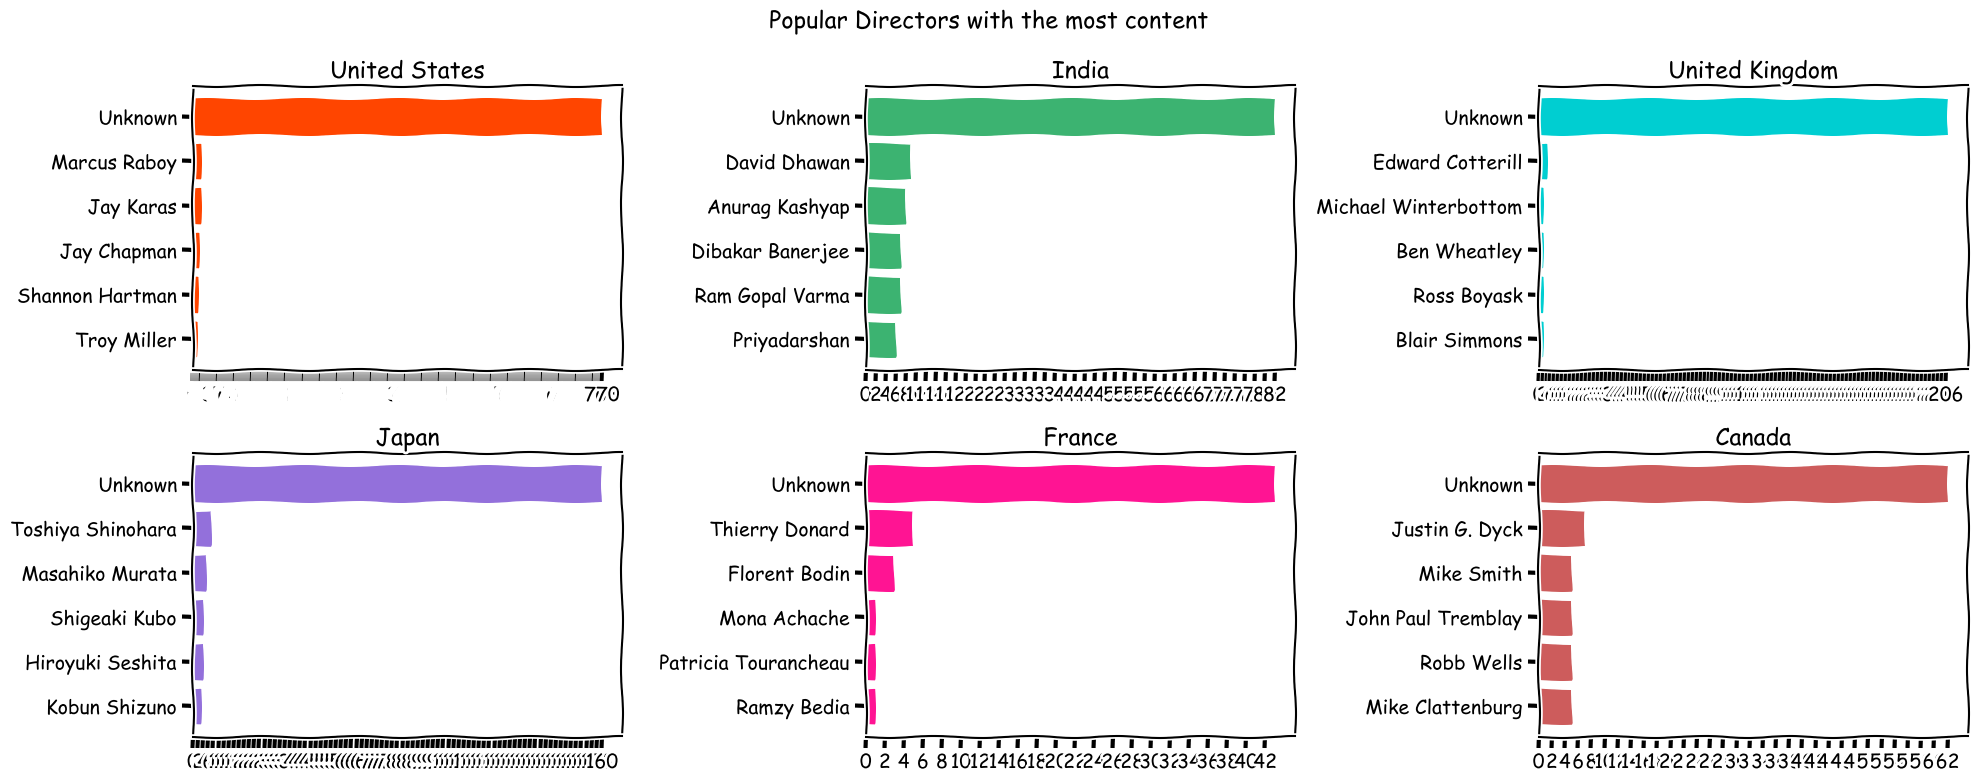

In [60]:
# Assuming netflix_data is your DataFrame containing the Netflix data and col is the column name for directors
col = "director"

# List of colors for each country
colors = ["orangered", "mediumseagreen", "darkturquoise", "mediumpurple", "deeppink", "indianred"]
countries_list = ["United States", "India", "United Kingdom", "Japan", "France", "Canada"]

# Create the figure with xkcd style
with plt.xkcd():
    plt.figure(num=None, figsize=(20, 8))
    x = 1
    for country, color in zip(countries_list, colors):
        country_df = netflix_data[netflix_data["country"] == country]
        categories = ", ".join(country_df[col].fillna("")).split(", ")
        counter_list = Counter(categories).most_common(6)
        counter_list = [_ for _ in counter_list if _[0] != ""]
        labels = [_[0] for _ in counter_list][::-1]
        values = [_[1] for _ in counter_list][::-1]
        if max(values) < 10:
            values_int = range(0, math.ceil(max(values)) + 1)
        else:
            values_int = range(0, math.ceil(max(values)) + 1, 2)
        plt.subplot(2, 3, x)
        plt.barh(labels, values, color=color)
        plt.xticks(values_int)
        plt.title(country)
        x += 1
    plt.suptitle('Popular Directors with the most content')
    plt.tight_layout()
    plt.show()


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

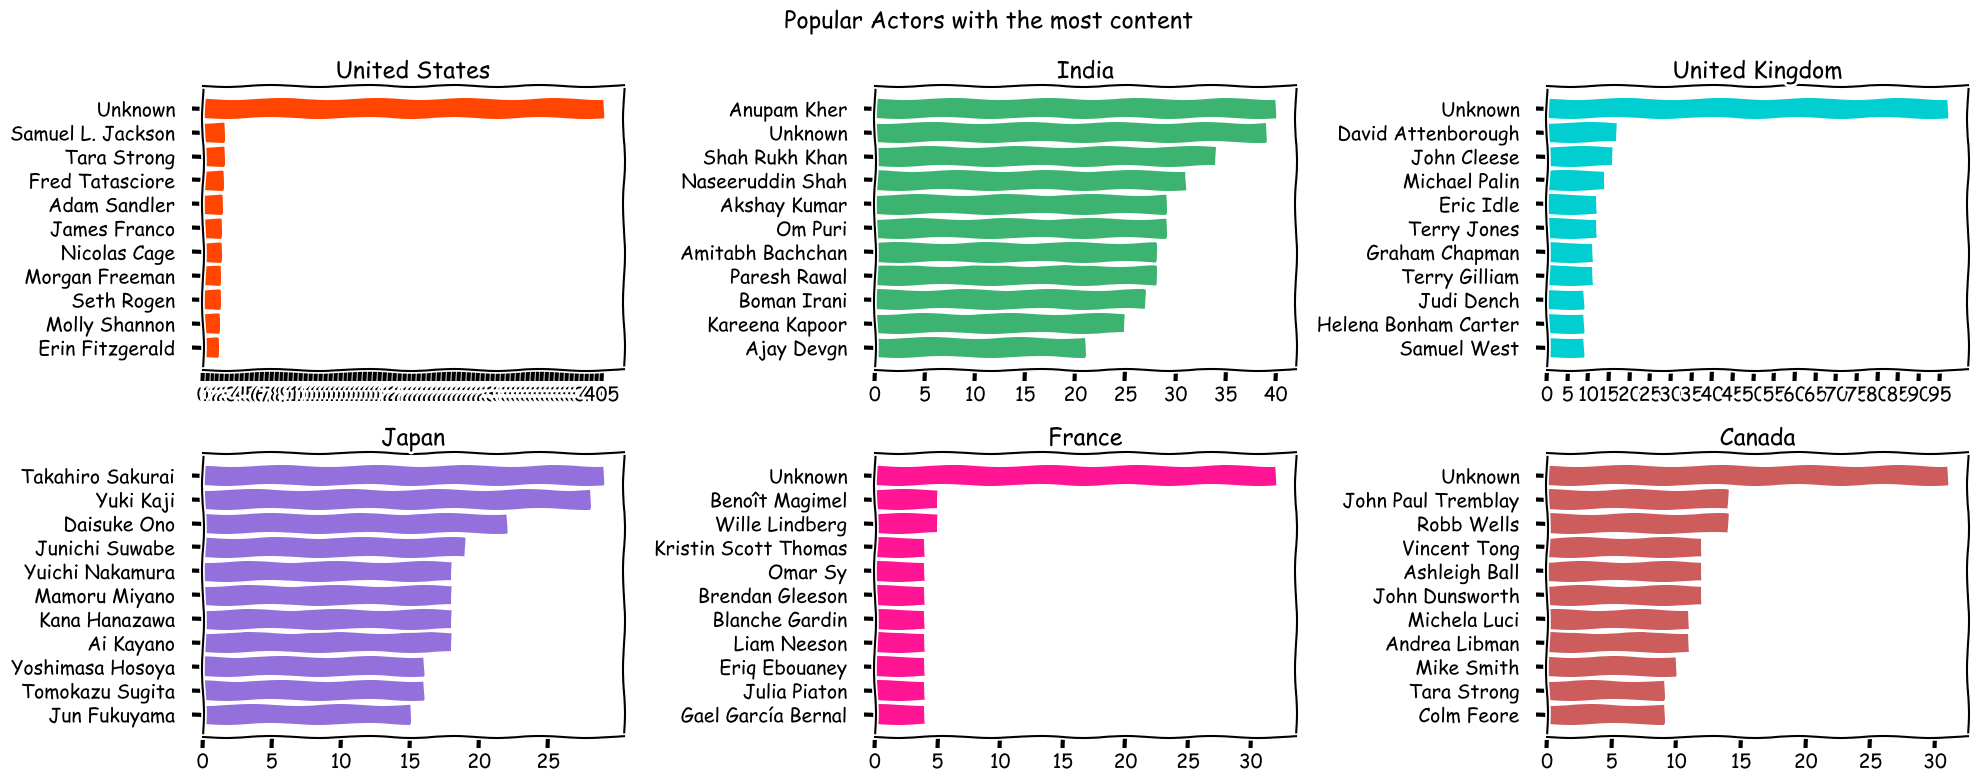

In [61]:
# Assuming netflix_data is your DataFrame containing the Netflix data and col is the column name for cast
col = "cast"

# List of colors for each country
colors = ["orangered", "mediumseagreen", "darkturquoise", "mediumpurple", "deeppink", "indianred"]
countries_list = ["United States", "India", "United Kingdom", "Japan", "France", "Canada"]

# Create the figure with xkcd style
with plt.xkcd():
    plt.figure(num=None, figsize=(20, 8))
    x = 1
    for country, color in zip(countries_list, colors):
        # Filter the DataFrame for contents from the current country
        netflix_data["from_country"] = netflix_data['country'].fillna("").apply(lambda x: 1 if country.lower() in x.lower() else 0)
        small = netflix_data[netflix_data["from_country"] == 1]
        
        # Extract cast and count occurrences
        cast = ", ".join(small[col].fillna("")).split(", ")
        tags = Counter(cast).most_common(11)
        tags = [_ for _ in tags if "" != _[0]]
        labels, values = [_[0]+"  " for _ in tags][::-1], [_[1] for _ in tags][::-1]
        
        # Set values for x-axis ticks
        if max(values) < 10:
            values_int = range(0, math.ceil(max(values)) + 1)
        elif 10 <= max(values) <= 20:
            values_int = range(0, math.ceil(max(values)) + 1, 2)
        else:
            values_int = range(0, math.ceil(max(values)) + 1, 5)
        
        # Plotting
        plt.subplot(2, 3, x)
        plt.barh(labels, values, color=color)
        plt.xticks(values_int)
        plt.title(country)
        x += 1
        
    plt.suptitle('Popular Actors with the most content')
    plt.tight_layout()
    plt.show()


In [62]:
# Sort the DataFrame by 'release_year' in ascending order
small = netflix_data.sort_values("release_year", ascending=True)

# Filter out rows where the 'duration' column is not empty
all_data = small[small['duration'] != ""]

# Reset the index of the filtered DataFrame
all_data.reset_index(inplace=True)

# Display the first 15 rows with the 'title' and 'release_year' columns
result = all_data[['title', 'release_year']][:15]
print(result)


                                               title  release_year
0                  Pioneers: First Women Filmmakers*          1925
1                                     Prelude to War          1942
2                               The Battle of Midway          1942
3      Undercover: How to Operate Behind Enemy Lines          1943
4                 Why We Fight: The Battle of Russia          1943
5                    WWII: Report from the Aleutians          1943
6                                   Tunisian Victory          1944
7                                  The Negro Soldier          1944
8   The Memphis Belle: A Story of a\nFlying Fortress          1944
9                                         San Pietro          1945
10               Five Came Back: The Reference Films          1945
11                           Know Your Enemy - Japan          1945
12                          Nazi Concentration Camps          1945
13               Pioneers of African-American Cinema          

In [63]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,from_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",0
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",0


In [64]:
netflix_data["year_diff"] = netflix_data["date_added"].dt.year - netflix_data["release_year"]

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

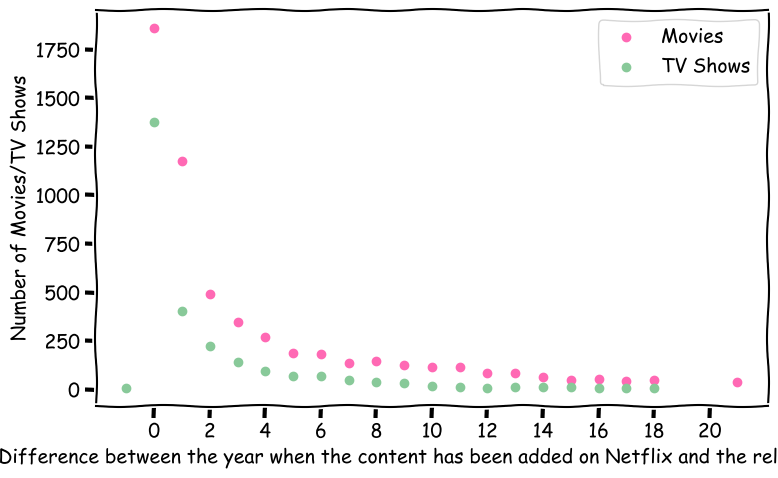

In [65]:
# Assuming 'year_diff' is the column name representing the difference between the year when the content was added to Netflix and the release year
col = "year_diff"

# Assuming you want to use the "type" column to filter TV shows
_movies = netflix_data[netflix_data["type"] == "Movie"]
_shows = netflix_data[netflix_data["type"] == "TV Show"]

# Count the occurrences of each unique value in the 'year_diff' column for movies
ped1 = _movies[col].value_counts().reset_index()
grouped1 = ped1.rename(columns={col: "count", "index": col})
grouped1 = grouped1.dropna()
grouped1 = grouped1.head(20)

# Count the occurrences of each unique value in the 'year_diff' column for TV shows
ped2 = _shows[col].value_counts().reset_index()
grouped2 = ped2.rename(columns={col: "count", "index": col})
grouped2 = grouped2.dropna()
grouped2 = grouped2.head(20)

# Plotting
with plt.xkcd():
    plt.figure(num=None, figsize=(8, 5))
    plt.scatter(grouped1[col], grouped1["count"], color="hotpink")
    plt.scatter(grouped2[col], grouped2["count"], color='#88c999')
    values_int = range(0, math.ceil(max(grouped1[col])) + 1, 2)
    plt.xticks(values_int)
    plt.xlabel("Difference between the year when the content has been added on Netflix and the release year")
    plt.ylabel("Number of Movies/TV Shows")
    plt.legend(["Movies", "TV Shows"])
    plt.tight_layout()
    plt.show()


In [66]:
print(netflix_data['rating'].unique())


['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' 'Unknown' 'TV-Y7-FV' 'UR']


In [67]:
ratings_list = ['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'TV-G', 'TV-Y', 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV']
ratings_dict = {
    'TV-G': 'Little Kids',
    'TV-Y': 'Little Kids',
    'G': 'Little Kids',
    'TV-PG': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'PG': 'Older Kids',
    'TV-Y7-FV': 'Older Kids',
    'PG-13': 'Teens',
    'TV-14': 'Teens',
    'TV-MA': 'Mature',
    'R': 'Mature',
    'NC-17': 'Mature'
}

for rating_val, rating_group in ratings_dict.items():
    netflix_data.loc[netflix_data['rating'] == rating_val, "rating"] = rating_group


/var/folders/89/zwv576xj2cggljymv3ln02780000gn/T/ipykernel_24592/1758476913.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_df = grouped.groupby(['release_year']).sum()
/var/folders/89/zwv576xj2cggljymv3ln02780000gn/T/ipykernel_24592/1758476913.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_df = grouped.groupby(['release_year']).sum()
/var/folders/89/zwv576xj2cggljymv3ln02780000gn/T/ipykernel_24592/1758476913.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or

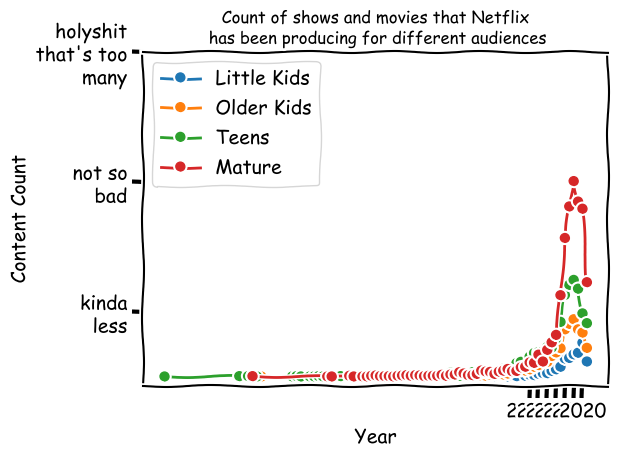

In [68]:
# Define the list of audience groups
ngs_group_list = ['Little Kids', 'Older Kids', 'Teens', 'Mature']

netflix_data['rating_val'] = 1
x = 0  # Initialize x for indexing colors

# Define the list of labels for yticks
labels = ['kinda\nless', 'not so\nbad', "holyshit\nthat's too\nmany"]

# Plotting with xkcd style
with plt.xkcd():
    for r in ngs_group_list:
        grouped = netflix_data[netflix_data['rating'] == r]
        # Assuming the column representing the year when the content was added is named 'release_year'
        year_df = grouped.groupby(['release_year']).sum()
        year_df.reset_index(level=0, inplace=True)
        # Assuming the column representing the year when the content was added is named 'release_year'
        plt.plot(year_df['release_year'], year_df['rating_val'], marker='o', label=r)
        values_int = range(2008, math.ceil(max(year_df['release_year'])) + 1, 2)
        plt.yticks([200, 600, 1000], labels)
        plt.xticks(values_int)
        plt.title('Count of shows and movies that Netflix\n has been producing for different audiences', fontsize=12)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Content Count', fontsize=14)
        x += 1

plt.legend()
plt.tight_layout()
plt.show()


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

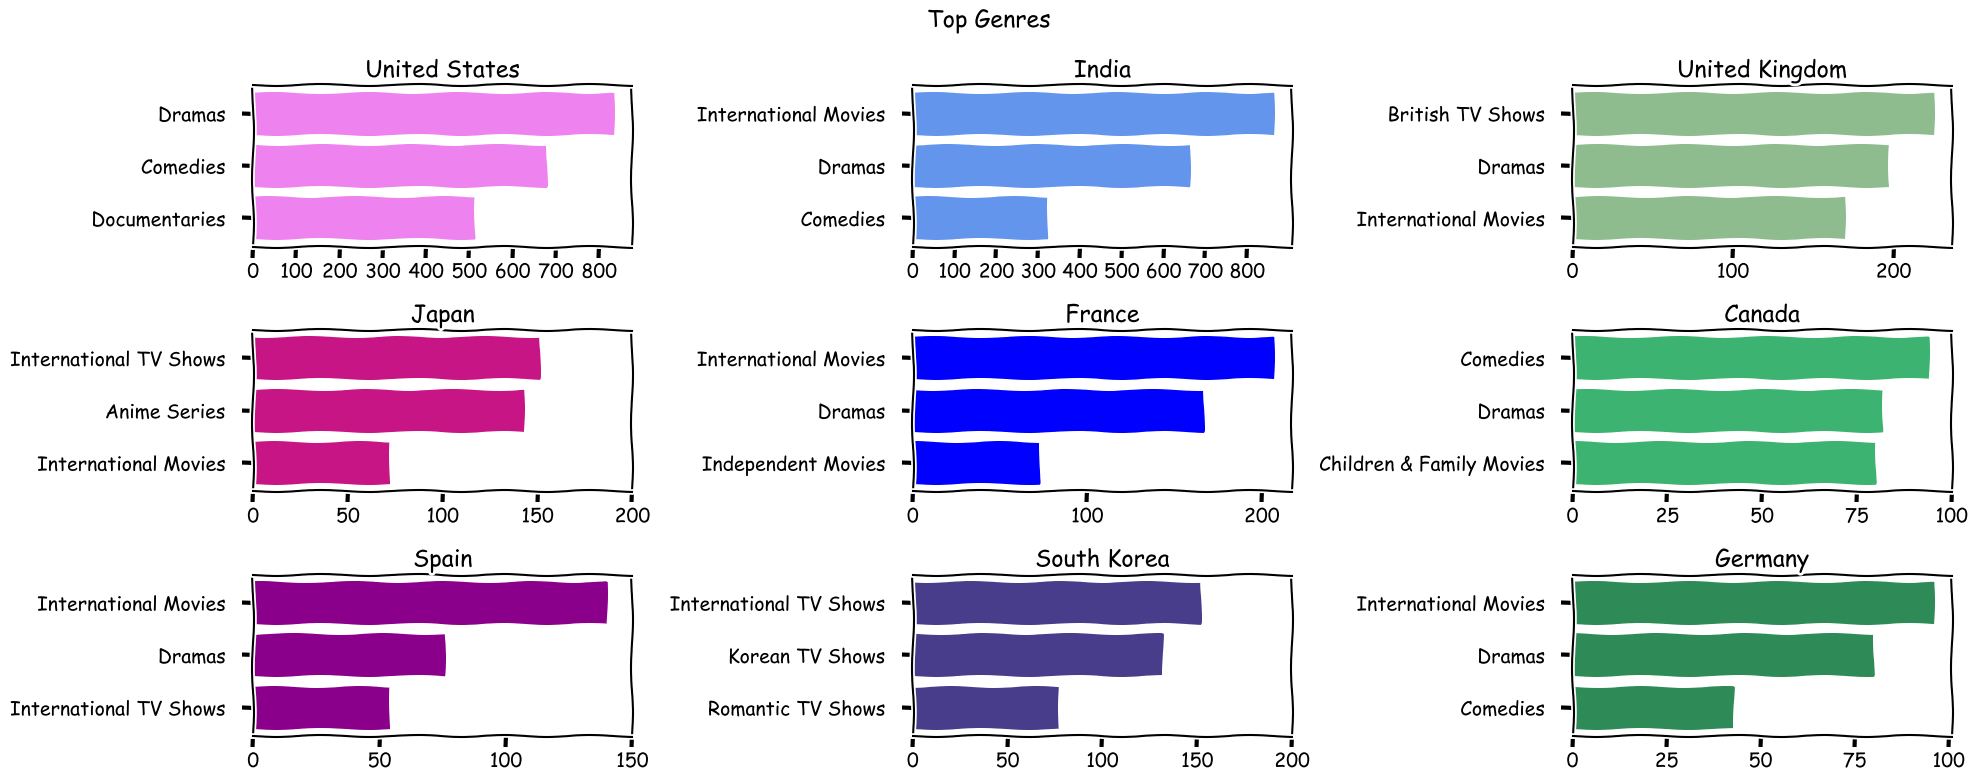

In [69]:
col = "listed_in"
colours = ["violet", "cornflowerblue", "darkseagreen", "mediumvioletred", "blue", "mediumseagreen", "darkmagenta", "darkslateblue", "seagreen"]
countries_list = ["United States", "India", "United Kingdom", "Japan", "France", "Canada", "Spain", "South Korea", "Germany"]

with plt.xkcd():
    plt.figure(num=None, figsize=(20, 8))
    x = 1
    for country in countries_list:
        netflix_data["from_country"] = netflix_data['country'].fillna("").apply(lambda x: 1 if country.lower() in x.lower() else 0)
        small = netflix_data[netflix_data["from_country"] == 1]
        genre = ", ".join(small['listed_in'].fillna("")).split(", ")
        tags = Counter(genre).most_common(3)
        tags = [_ for _ in tags if "" != _[0]]
        labels, values = [_[0] + "  " for _ in tags][::-1], [_[1] for _ in tags][::-1]
        if max(values) > 200:
            values_int = range(0, math.ceil(max(values)), 100)
        elif max(values) > 100 and max(values) <= 200:
            values_int = range(0, math.ceil(max(values)) + 50, 50)
        else:
            values_int = range(0, math.ceil(max(values)) + 25, 25)
        plt.subplot(3, 3, x)
        plt.barh(labels, values, color=colours[x - 1])
        plt.xticks(values_int)
        plt.title(country)
        x += 1
    plt.suptitle('Top Genres')
    plt.tight_layout()
    plt.show()


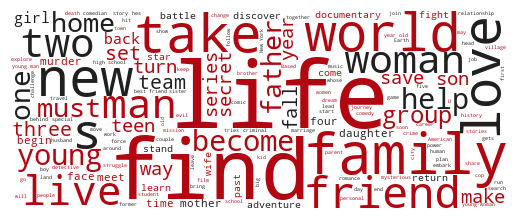

In [70]:
# Custom colour map based on Netflix palette
cmap = mcolors.ListedColormap(['#221f1f', '#b20710'])

# Convert description column to a single string
text = str(list(netflix_data['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

# Generate word cloud
wordcloud = WordCloud(background_color='white', width=500, height=200, colormap=cmap, max_words=150).generate(text)

# Plot word cloud
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


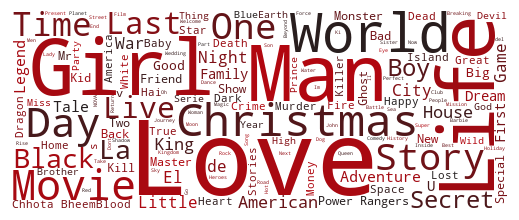

In [75]:
cmap = mcolors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])
text = str(list(netflix_data['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
wordcloud = WordCloud(background_color='white', width=500, height=200, colormap=cmap, max_words=150).generate(text)


plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
